## Observations and Insights 

In [1]:
%matplotlib inline

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_clinical_study_df = pd.merge(mouse_metadata, study_results, how='left', on="Mouse ID")
combined_clinical_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the DataFrame.
mice = len(combined_clinical_study_df["Mouse ID"].value_counts())
mice

249

In [9]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
groupby_id = combined_clinical_study_df.groupby(["Mouse ID"])
locate_duplicates = groupby_id["Timepoint"].value_counts()
locate_duplicates_df = locate_duplicates.to_frame()
locate_duplicates_df

duplicates_df = locate_duplicates_df.loc[(locate_duplicates_df["Timepoint"] > 1)]
duplicates_df

Timepoint
Mouse ID Timepoint           
g989     0                  2
         5                  2
         10                 2
         15                 2
         20                 2

In [11]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_clinical_study_df.loc[combined_clinical_study_df["Mouse ID"] == "g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [12]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_clinical_study_df[combined_clinical_study_df["Mouse ID"] !="g989"]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [14]:
# Checking the number of mice in the clean DataFrame.
len(clean_df["Mouse ID"].value_counts())

248

## Summary Statistics

In [106]:
# Test groupby for 'drug regimen'
regimen_groupby = clean_df.groupby(["Drug Regimen"])
regimen_groupby.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
748,c927,Propriva,Female,4,26,25,56.545519,2
749,c927,Propriva,Female,4,26,30,60.753925,2
750,c927,Propriva,Female,4,26,35,61.872274,3
751,c927,Propriva,Female,4,26,40,64.183229,4


In [102]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straightforward, creating multiple series and putting them all together at the end.

regimen_mean = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).mean()
regimen_median = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).median()
regimen_variance = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).var()
regimen_standard_dev = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).std()
regimen_sem = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).sem()

study_statistics_df = pd.DataFrame({"Tumor Volume Mean": regimen_mean, 
                                    "Tumor Volume Median": regimen_median, 
                                    "Tumor Volume Variance": regimen_variance, 
                                    "Tumor Volume SD": regimen_standard_dev, 
                                    "Tumor Volume SEM": regimen_sem})
study_statistics_df


,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume SD,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [103]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function.
# Use aggregation function to produce the same summary statistics in a singly groupby. 

study_statistics_agg = clean_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"])
study_statistics_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar Plots

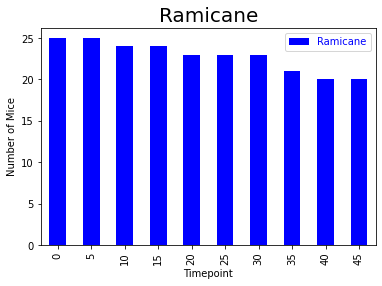

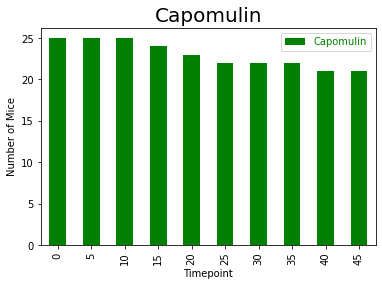

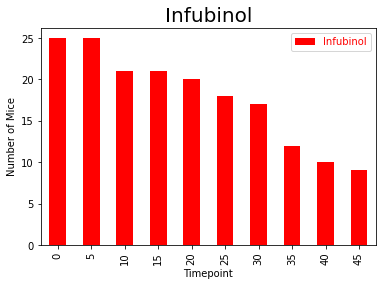

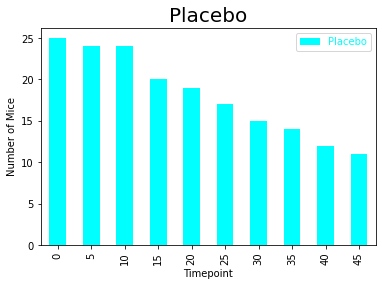

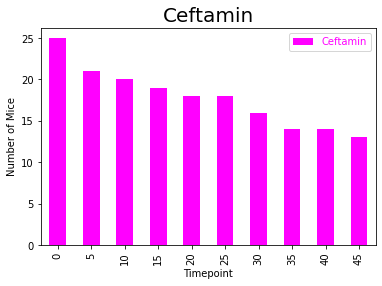

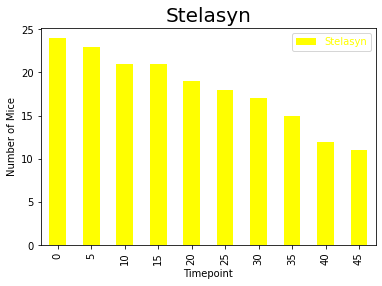

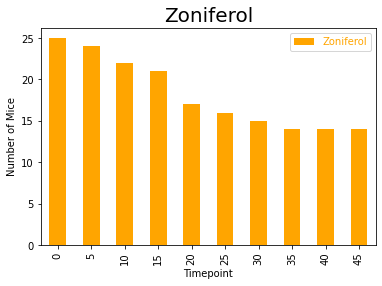

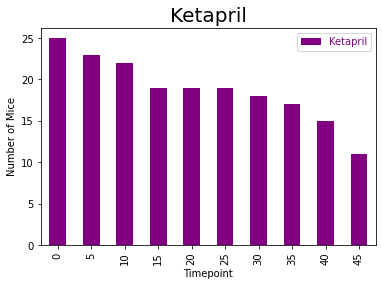

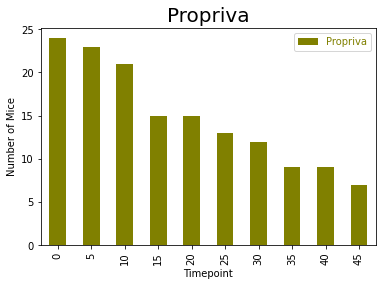

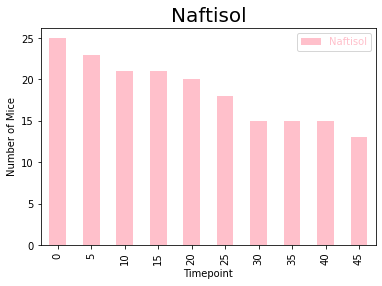

In [121]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
treatments = clean_df["Drug Regimen"].unique()
color = ["blue","green","red","cyan","magenta","yellow","orange","purple","olive","pink"]
treatments_count = len(treatments)
for treatment in range(treatments_count):
    mice_treatment = (clean_df[["Drug Regimen", "Timepoint", "Mouse ID"]]
                      .loc[clean_df["Drug Regimen"] == treatments[treatment]]
                      .set_index("Drug Regimen")
                      .groupby(by = "Timepoint")
                      .count()
                 )

    yvalues=[mice_treatment[y] for y in mice_treatment]
    mice_treatment.plot(kind="bar", color = color[treatment])
    plt.title(treatments[treatment], fontsize=20, color = "black")
    plt.ylabel("Number of Mice")
    plt.legend([treatments[treatment]], labelcolor = color[treatment], loc="best")
plt.show()

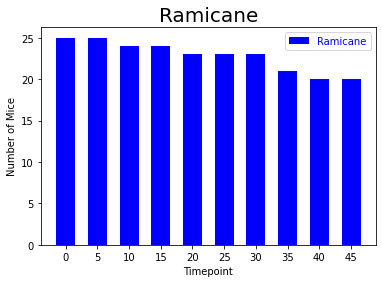

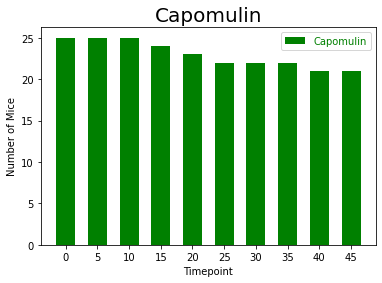

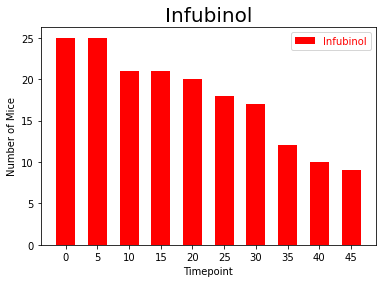

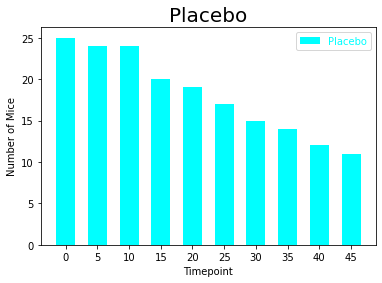

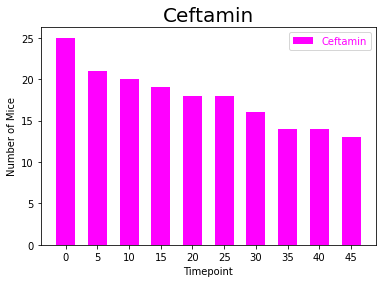

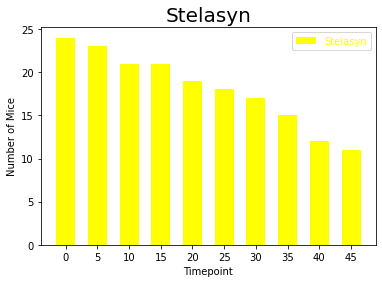

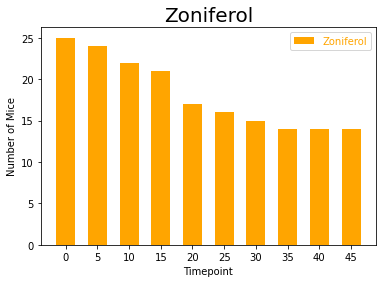

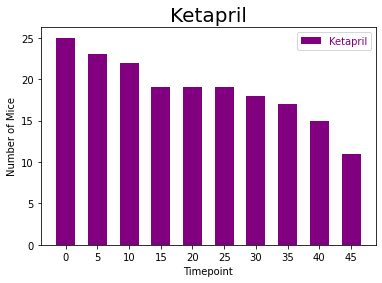

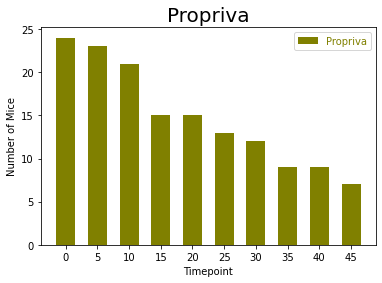

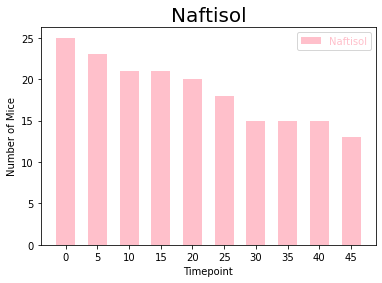

In [126]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
# treatments = clean_df["Drug Regimen"].unique()
# color = ["blue","green","red","cyan","magenta","yellow","orange","purple","olive","pink"]
# treatments_count = len(treatments)
timepoints = clean_df["Timepoint"].unique()

for treatment in range(treatments_count):
    mice_treatment = (clean_df[["Drug Regimen", "Timepoint", "Mouse ID"]]
                      .loc[clean_df["Drug Regimen"] == treatments[treatment]]
                      .set_index("Drug Regimen")
                      .groupby(by = "Timepoint")
                      .count()
                 )

    y_values = pd.Series(mice_treatment["Mouse ID"])
    plt.bar(x = timepoints, height = y_values, color = color[treatment], width=3, tick_label = timepoints)
    plt.title(treatments[treatment], fontsize=20, color = "black")
    plt.xlabel("Timepoint")
    plt.ylabel("Number of Mice")
    plt.legend([treatments[treatment]], labelcolor = color[treatment], loc = "best")
    plt.show()

## Pie Plots

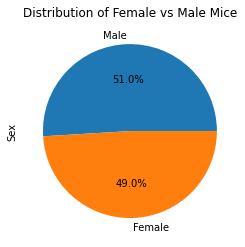

In [183]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = clean_df["Sex"].value_counts()
gender_df.plot(kind="pie", y='Sex', title=("Distribution of Female vs Male Mice"), autopct= "%1.1f%%")
plt.show()

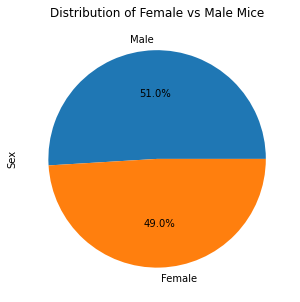

In [185]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Male', 'Female']
sizes = [49.0, 51.0]
plot_pie = gender_df.plot.pie(y='Total Count', labels = labels, autopct="%1.1f%%", figsize=(5, 5))
plt.title("Distribution of Female vs Male Mice")
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [212]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

# Create a variable for the four most promoising treatments
promoising_treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Get the maximum timepoint for each mouse
max_timepoint_df = pd.DataFrame(combined_clinical_study_df.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={"Timepoint": "Maximum Timepoint"})
max_timepoint_df

# Merge max_timepoint_df to the combined_clinical_study_df
merged_data_df = pd.merge(combined_clinical_study_df, max_timepoint_df, on='Mouse ID')
merged_data_df.head()

# Create for loops for each treatment
# Create an empty list to fill with turmor volume data for plotting
final_tumor_vol = []

for treatment in promoising_treatments:
    # determine the rows containing mice info
    treatment_df = merged_data_df.loc[merged_data_df["Drug Regimen"] == treatment]
    # include subset
    final_volume_df = treatment_df[treatment_df["Timepoint"] == treatment_df["Maximum Timepoint"]]
    # create a series that lists all final tumor values
    tumor_values = final_volume_df["Tumor Volume (mm3)"]
    final_tumor_vol.append(tumor_values)
    
    # Calculate quartiles, IRQ to determine outliers
    quartiles = tumor_values.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    medianq = quartiles[0.5]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # Locate outliers
    outliers_df = (tumor_values.loc[(final_volume_df['Tumor Volume (mm3)'] >= upper_bound) |
                                (final_volume_df['Tumor Volume (mm3)'] <= lower_bound)]).count()
    
    print(f'IQR for {treatment}: {iqr}')
    print(f'Lower Bound for {treatment}: {lower_bound}')
    print(f'Upper Bound for {treatment}: {upper_bound}')
    print(f'Number of {treatment} Outliers: {outliers_df}')
    print("------------------------------------------------------------")
    
    

IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Number of Capomulin Outliers: 0
------------------------------------------------------------
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Number of Ramicane Outliers: 0
------------------------------------------------------------
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Number of Infubinol Outliers: 1
------------------------------------------------------------
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Number of Ceftamin Outliers: 0
------------------------------------------------------------


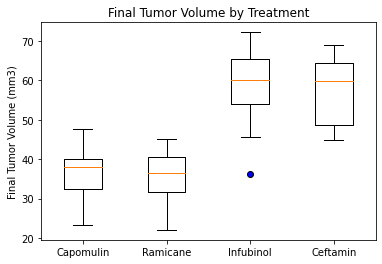

In [224]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Using Matplotlib, generate a box and whisker plot of the final tumor volume for all four treatment regimens and highlight any potential outliers in the plot by changing their color and style.
# All four box plots should be within the same figure. Use the Matplotlib documentation page for help with changing the style of the outliers.

# Format outliers on boxplot for visibility
flierprops = dict(marker='o', markerfacecolor='b', markersize=6, markeredgecolor='black')

# Boxplot
plt.boxplot(final_tumor_vol, flierprops=flierprops)

# Format the boxplot
plt.title('Final Tumor Volume by Treatment')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()


## Line and Scatter Plots

In [15]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# Plot the linear regression model on top of the previous scatter plot.


In [ ]:
# Observations:
# Look across all previously generated figures and tables and write at least three observations or inferences that can be made from the data. 
# Include these observations at the top of notebook.
